# 의사 결정 나무
- 트리 구조를 이용하여 데이터 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내는 알고리즘
    - 스무고개와 유사
    - 의사결정나무는 분류(범주형 레이블)와 회귀(연속형 레이블)에 모두 사용 가능

- 각 변수의 영역을 재귀적으로 분할하면서 규칙을 생성 
    - if-else 형식으로 표현되는 규칙이 생성 

- 분류의 경우 특성의 영역을 분할하면서 정보 균일도(분류된 세트에 포함된 정보가 비슷한 정도)가 높게 하도록 분할
    - 정보 균일도 : 정보 균일도를 측정하는 방법은 엔트로피(Entropy)를 이용하는 방법과 Gini를 이용하는 방법이 있음

- 회귀의 경우 잔차 제곱합이 최소가 되도록 분할
    - 영역을 분할 후 각 영역의 순도 증가 및 불순도 또는 불확실성이 최대한 감소하도록 학습 


# 지니 계수
- 주어진 데이터 집합의 불순도 ( 값이 작을수록 데이터가 균일 )
    - 0에 가까울수록 데이터가 평등하고 1로 갈수록 불평등
    - Decision Tree에서, 임의로 2개 data를 선택했을 때 서로 다를 확률
    
# 엔트로피
- 주어진 데이터 집합의 혼잡도(값이 작을수록 데이터가 균일)

# 의사 결정 나무 분류 실습

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 분류 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/breast_cancer.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [6]:
# 범주 비율 확인
pd.value_counts(Y, normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [8]:
# 학습용과 평가용으로 데이터 분할
 # 층화 분리 적용 (범주의 비율이 불균형하기 때문)
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [9]:
# 분리 결과 확인
pd.value_counts(y_train, normalize=True)

1    0.626761
0    0.373239
Name: target, dtype: float64

In [10]:
# 분리 결과 확인
pd.value_counts(y_test, normalize=True)

1    0.629371
0    0.370629
Name: target, dtype: float64

In [11]:
# 모델 생성
model = DecisionTreeClassifier() 

In [12]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

DecisionTreeClassifier()

In [13]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

# 학습 데이터 성능이 1 -> 과대 적합!

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.9300699300699301


In [14]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [15]:
# classification_report 계산 - 범주가 불균형할 때 보는 지표
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        53
           1       0.97      0.92      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [16]:
# 최대 깊이 조절
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

# 학습 데이터 성능이 줄어들었지만 평가 데이터 성능이 상승 -> 모델이 일반화됨

학습 데이터 성능 : 0.9765258215962441
평가 데이터 성능 : 0.916083916083916


In [17]:
# 특성 중요도 조회
model.feature_importances_ # 총합은 1임

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01069388, 0.01090021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04022023, 0.03226776, 0.79120523, 0.        , 0.        ,
       0.        , 0.        , 0.11471269, 0.        , 0.        ])

<AxesSubplot: >

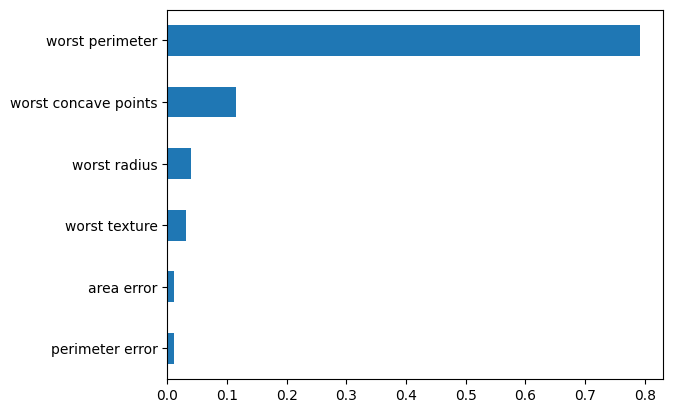

In [18]:
# 특성 중요도 시각화
fi = pd.Series(model.feature_importances_, index=model.feature_names_in_)
fi[fi != 0].sort_values().plot(kind='barh')

## 제출

제출을 위해 새로 불러온 `breast_cancer.csv` 데이터를 통해 분류를 위한 Decision Tree 모델을 만들고 학습한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- Decision Tree 모델을 생성할 때 **반드시 `random_state=SEED`를 추가해야 합니다.** 이를 추가하지 않으면 제대로 채점되지 않습니다.

In [21]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_csv('/mnt/elice/dataset/breast_cancer.csv')

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=SEED)

# TODO: Decision Tree 모델을 학습하세요.
model = DecisionTreeClassifier().fit(x_train, y_train)
result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [22]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.464 seconds
=== Message ===
제출 완료되었습니다.


0